In [4]:
import pandas as pd
import numpy as np

In [5]:
# Load the CSV file into a DataFrame
file_path = 'D://Learning//Sample Data//Copper_Set.xlsx - Result 1.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information
data.head(), data.info(), data.describe(include='all')

C:\Users\venka\AppData\Local\Temp\ipykernel_13476\4268340596.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


(                                     id   item_date quantity tons    customer  \
 0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0     54.151139  30156308.0   
 1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0    768.024839  30202938.0   
 2  E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0    386.127949  30153963.0   
 3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0    202.411065  30349574.0   
 4  4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0    785.526262  30211560.0   
 
    country status item type  application  thickness   width  \
 0     28.0    Won         W         10.0       2.00  1500.0   
 1     25.0    Won         W         41.0       0.80  1210.0   
 2     30.0    Won        WI         28.0       0.38   952.0   
 3     32.0    Won         S         59.0       2.30  1317.0   
 4     28.0    Won         W         10.0       4.00  2000.0   
 
               material_ref  product_ref  delivery date  selling_price  
 0              DEQ1 S460MC   1670798778     20

In [6]:
# id column is unique so we drop the id column
data.drop(columns=['id'],inplace=True)

In [7]:

# verify the number of unique values in each features

for i in list(data.columns):
    print(f"{i}:{data[i].nunique()}")

item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16410
product_ref:33
delivery date:28
selling_price:9795


In [8]:
df_copy = data.copy()

In [18]:
df_copy['customer']

0         30156308.0
1         30202938.0
2         30153963.0
3         30349574.0
4         30211560.0
             ...    
181668    30200854.0
181669    30200854.0
181670    30200854.0
181671    30200854.0
181672    30200854.0
Name: customer, Length: 181673, dtype: float64

In [17]:
# Sort by a specific column, e.g., 'customer'
sorted_df = df_copy.sort_values(by='customer')

# Print the sorted column
print(sorted_df['customer'])

45238     1.245800e+04
29291     3.014762e+07
19082     3.014762e+07
19074     3.014762e+07
19090     3.014762e+07
              ...     
108987    2.147484e+09
109001    2.147484e+09
131447    2.147484e+09
131451    2.147484e+09
104684             NaN
Name: customer, Length: 181673, dtype: float64


In [6]:
# Convert columns
# here coerce means while conversion if data is at another data type it raise a value error to overcome this coerce uses it converts them into NaN
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')
data['item_date_1'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce').dt.date
data['delivery date_1'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [7]:
data.head(5)

item_date  quantity tons    customer  country status item type  \
0  20210401.0      54.151139  30156308.0     28.0    Won         W   
1  20210401.0     768.024839  30202938.0     25.0    Won         W   
2  20210401.0     386.127949  30153963.0     30.0    Won        WI   
3  20210401.0     202.411065  30349574.0     32.0    Won         S   
4  20210401.0     785.526262  30211560.0     28.0    Won         W   

   application  thickness   width             material_ref  product_ref  \
0         10.0       2.00  1500.0              DEQ1 S460MC   1670798778   
1         41.0       0.80  1210.0                   104991   1668701718   
2         28.0       0.38   952.0                 S0380700       628377   
3         59.0       2.30  1317.0  DX51D+ZM310MAO 2.3X1317   1668701718   
4         10.0       4.00  2000.0          2_S275JR+AR-CL1       640665   

   delivery date  selling_price item_date_1 delivery date_1  
0     20210701.0         854.00  2021-04-01      2021-07-01  
1     20210401.0        1047.00  2021-04-01      2021-04-01  
2     20210101.0         644.33  2021-04-01      2021-01-01  
3     20210101.0         768.00  2021-04-01      2021-01-01  
4     20210301.0         577.00  2021-04-01      2021-03-01

In [8]:
data['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [9]:
# check any null values in data
data.isnull().sum()

item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        3
dtype: int64

In [10]:
# drop['material_ref'] because mostly null values
data.drop(columns=['material_ref'],inplace=True)

In [11]:
data['quantity tons'].head(3)

0     54.151139
1    768.024839
2    386.127949
Name: quantity tons, dtype: float64

In [12]:
data.describe().T

count          mean           std          min  \
item_date      181672.0  2.020459e+07  4.551119e+03  19950000.00   
quantity tons  181672.0  5.874926e+03  2.349081e+06     -2000.00   
customer       181672.0  3.051221e+07  2.433382e+07     12458.00   
country        181645.0  4.489302e+01  2.440421e+01        25.00   
application    181649.0  2.561581e+01  1.775417e+01         2.00   
thickness      181672.0  2.564827e+00  6.572321e+00         0.18   
width          181673.0  1.295287e+03  2.616318e+02         1.00   
product_ref    181673.0  4.739679e+08  7.175101e+08    611728.00   
delivery date  181672.0  2.020738e+07  2.411059e+04  20190401.00   
selling_price  181672.0  1.918036e+03  3.317956e+05     -1160.00   

                        25%           50%           75%           max  
item_date      2.020093e+07  2.020113e+07  2.021020e+07  2.021040e+07  
quantity tons  1.097030e+01  3.036464e+01  6.716061e+01  1.000000e+09  
customer       3.019688e+07  3.020524e+07  3.028042e+07  2.147484e+09  
country        2.600000e+01  3.000000e+01  7.800000e+01  1.130000e+02  
application    1.000000e+01  1.500000e+01  4.100000e+01  9.900000e+01  
thickness      7.000000e-01  1.500000e+00  3.000000e+00  2.500000e+03  
width          1.180000e+03  1.250000e+03  1.500000e+03  2.990000e+03  
product_ref    6.119930e+05  6.406650e+05  1.332077e+09  1.722208e+09  
delivery date  2.020110e+07  2.021010e+07  2.021040e+07  3.031010e+07  
selling_price  6.690000e+02  8.120000e+02  9.530000e+02  1.000010e+08

In [13]:
# here quantiy tons and selling price having negative values so we convert negative values to null
data['quantity tons'] = data['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
data['selling_price'] = data['selling_price'].apply(lambda x:np.nan if x<=0 else x)

In [14]:
data.describe().T

count          mean           std           min  \
item_date      181672.0  2.020459e+07  4.551119e+03  1.995000e+07   
quantity tons  181668.0  5.875066e+03  2.349107e+06  1.000000e-05   
customer       181672.0  3.051221e+07  2.433382e+07  1.245800e+04   
country        181645.0  4.489302e+01  2.440421e+01  2.500000e+01   
application    181649.0  2.561581e+01  1.775417e+01  2.000000e+00   
thickness      181672.0  2.564827e+00  6.572321e+00  1.800000e-01   
width          181673.0  1.295287e+03  2.616318e+02  1.000000e+00   
product_ref    181673.0  4.739679e+08  7.175101e+08  6.117280e+05   
delivery date  181672.0  2.020738e+07  2.411059e+04  2.019040e+07   
selling_price  181665.0  1.918124e+03  3.318020e+05  1.000000e-01   

                        25%           50%           75%           max  
item_date      2.020093e+07  2.020113e+07  2.021020e+07  2.021040e+07  
quantity tons  1.097122e+01  3.036501e+01  6.716134e+01  1.000000e+09  
customer       3.019688e+07  3.020524e+07  3.028042e+07  2.147484e+09  
country        2.600000e+01  3.000000e+01  7.800000e+01  1.130000e+02  
application    1.000000e+01  1.500000e+01  4.100000e+01  9.900000e+01  
thickness      7.000000e-01  1.500000e+00  3.000000e+00  2.500000e+03  
width          1.180000e+03  1.250000e+03  1.500000e+03  2.990000e+03  
product_ref    6.119930e+05  6.406650e+05  1.332077e+09  1.722208e+09  
delivery date  2.020110e+07  2.021010e+07  2.021040e+07  3.031010e+07  
selling_price  6.690000e+02  8.120000e+02  9.530000e+02  1.000010e+08

In [15]:
# check null values for all features
data.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery date_1     3
dtype: int64

In [16]:
data.dtypes

item_date          float64
quantity tons      float64
customer           float64
country            float64
status              object
item type           object
application        float64
thickness          float64
width              float64
product_ref          int64
delivery date      float64
selling_price      float64
item_date_1         object
delivery date_1     object
dtype: object

In [17]:

# Handling null values using median and mode
# median - middle value in dataset (asc/desc), mode - value that appears most frequently in dataset


# object datatype using mode
from re import T


data['item_date'].fillna(data['item_date'].mode().iloc[0],inplace=True)
data['item_date_1'].fillna(data['item_date'].mode().iloc[0],inplace=True)
data['delivery date'].fillna(data['delivery date'].mode().iloc[0],inplace=True)
data['delivery date_1'].fillna(data['delivery date'].mode().iloc[0],inplace=True)
data['status'].fillna(data['status'].mode().iloc[0],inplace=True)

C:\Users\venka\AppData\Local\Temp\ipykernel_25348\12390244.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['item_date'].fillna(data['item_date'].mode().iloc[0],inplace=True)
C:\Users\venka\AppData\Local\Temp\ipykernel_25348\12390244.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [18]:
# numerical datatype using median
data['quantity tons'].fillna(data['quantity tons'].median(), inplace=True)
data['customer'].fillna(data['customer'].median(), inplace=True)
data['country'].fillna(data['country'].median(), inplace=True)
data['application'].fillna(data['application'].median(), inplace=True)
data['thickness'].fillna(data['thickness'].median(), inplace=True)
data['selling_price'].fillna(data['selling_price'].median(), inplace=True)


C:\Users\venka\AppData\Local\Temp\ipykernel_25348\3273606173.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['quantity tons'].fillna(data['quantity tons'].median(), inplace=True)
C:\Users\venka\AppData\Local\Temp\ipykernel_25348\3273606173.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [19]:
data.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [20]:
# convert categorical data into numerical data - using map and ordinal encoder methods

from sklearn.preprocessing import OrdinalEncoder


data['status'] = data['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
data['item type'] = OrdinalEncoder().fit_transform(data[['item type']])
data.head(3)

item_date  quantity tons    customer  country  status  item type  \
0  20210401.0      54.151139  30156308.0     28.0       1        5.0   
1  20210401.0     768.024839  30202938.0     25.0       1        5.0   
2  20210401.0     386.127949  30153963.0     30.0       1        6.0   

   application  thickness   width  product_ref  delivery date  selling_price  \
0         10.0       2.00  1500.0   1670798778     20210701.0         854.00   
1         41.0       0.80  1210.0   1668701718     20210401.0        1047.00   
2         28.0       0.38   952.0       628377     20210101.0         644.33   

  item_date_1 delivery date_1  
0  2021-04-01      2021-07-01  
1  2021-04-01      2021-04-01  
2  2021-04-01      2021-01-01

In [21]:

# array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)
data['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [22]:
# final verification of null values after encoding
data.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [23]:

data.describe().T

count          mean           std           min  \
item_date      181673.0  2.020459e+07  4.551114e+03  1.995000e+07   
quantity tons  181673.0  5.874905e+03  2.349075e+06  1.000000e-05   
customer       181673.0  3.051221e+07  2.433375e+07  1.245800e+04   
country        181673.0  4.489073e+01  2.440303e+01  2.500000e+01   
status         181673.0  1.316684e+00  1.330310e+00  0.000000e+00   
item type      181673.0  4.133036e+00  1.055230e+00  0.000000e+00   
application    181673.0  2.561441e+01  1.775342e+01  2.000000e+00   
thickness      181673.0  2.564822e+00  6.572303e+00  1.800000e-01   
width          181673.0  1.295287e+03  2.616318e+02  1.000000e+00   
product_ref    181673.0  4.739679e+08  7.175101e+08  6.117280e+05   
delivery date  181673.0  2.020738e+07  2.411052e+04  2.019040e+07   
selling_price  181673.0  1.918076e+03  3.317947e+05  1.000000e-01   

                        25%           50%           75%           max  
item_date      2.020093e+07  2.020113e+07  2.021020e+07  2.021040e+07  
quantity tons  1.097167e+01  3.036501e+01  6.716038e+01  1.000000e+09  
customer       3.019688e+07  3.020524e+07  3.028042e+07  2.147484e+09  
country        2.600000e+01  3.000000e+01  7.800000e+01  1.130000e+02  
status         1.000000e+00  1.000000e+00  1.000000e+00  8.000000e+00  
item type      3.000000e+00  5.000000e+00  5.000000e+00  6.000000e+00  
application    1.000000e+01  1.500000e+01  4.100000e+01  9.900000e+01  
thickness      7.000000e-01  1.500000e+00  3.000000e+00  2.500000e+03  
width          1.180000e+03  1.250000e+03  1.500000e+03  2.990000e+03  
product_ref    6.119930e+05  6.406650e+05  1.332077e+09  1.722208e+09  
delivery date  2.020110e+07  2.021010e+07  2.021040e+07  3.031010e+07  
selling_price  6.690000e+02  8.120000e+02  9.530000e+02  1.000010e+08

In [24]:

# find outliers - box plot & skewed data - hist plot and violin plot

from matplotlib import pyplot as plt
import seaborn as sns


def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

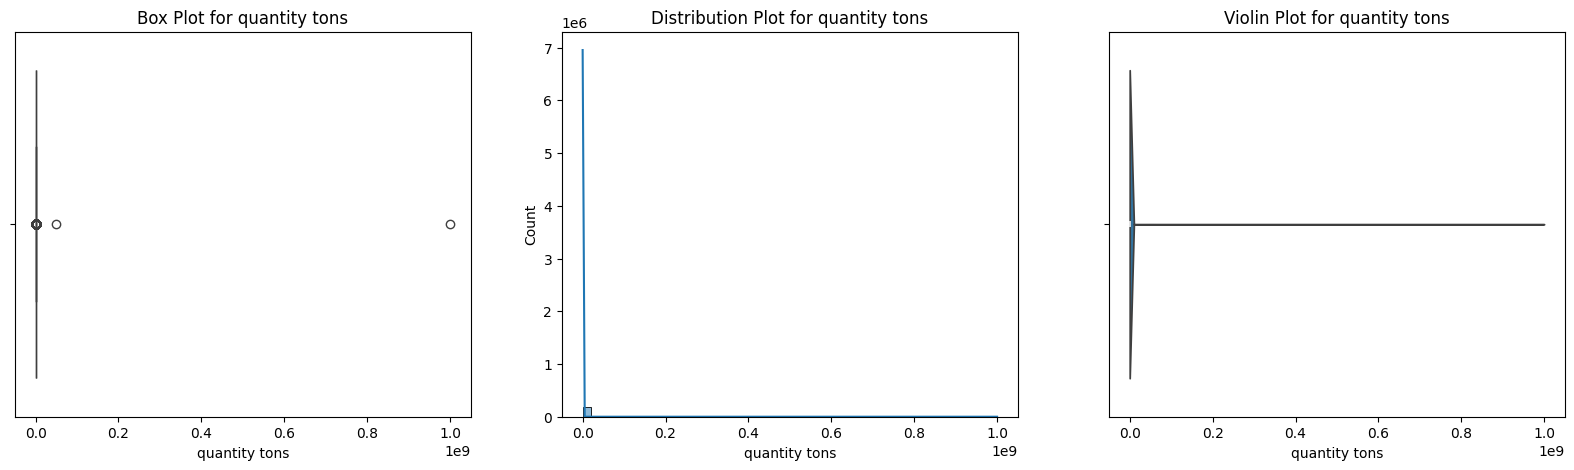

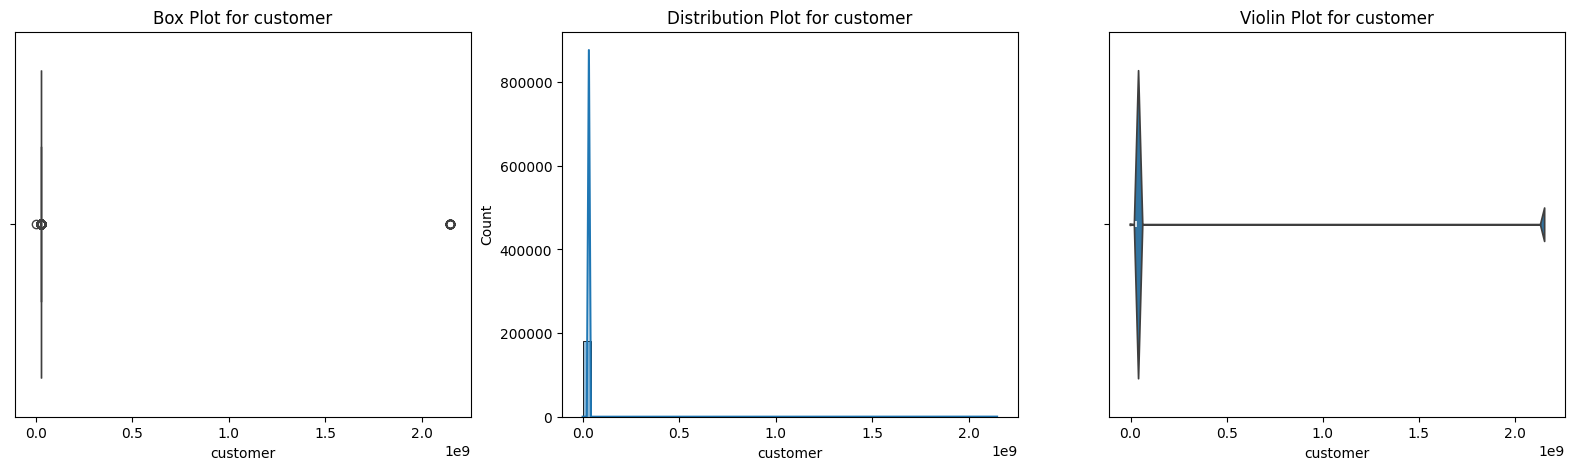

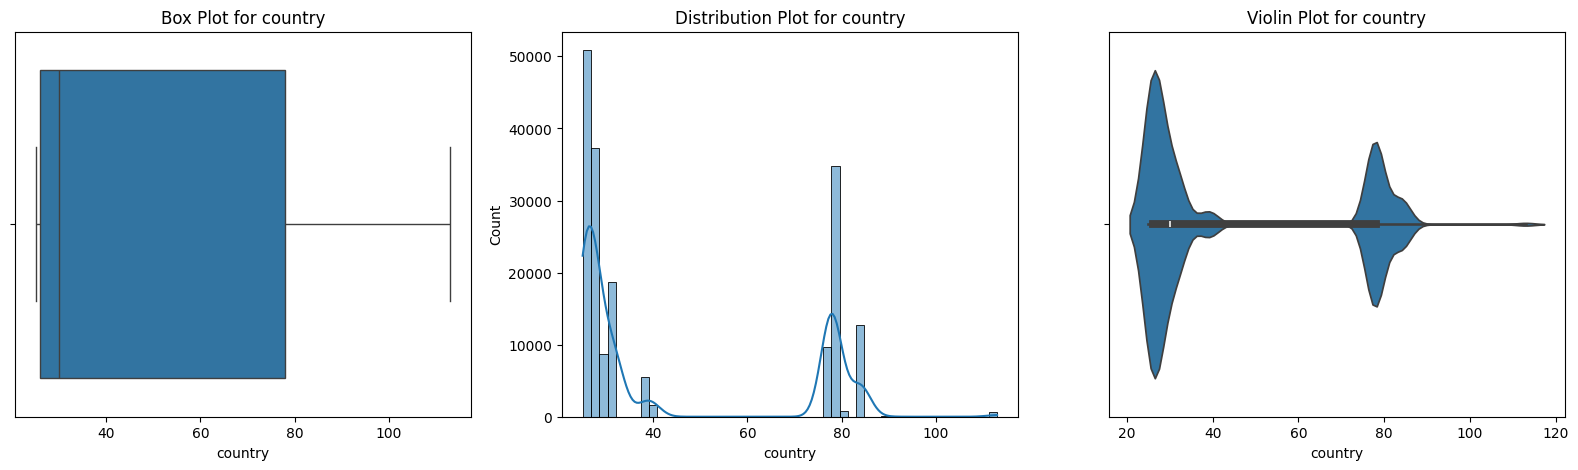

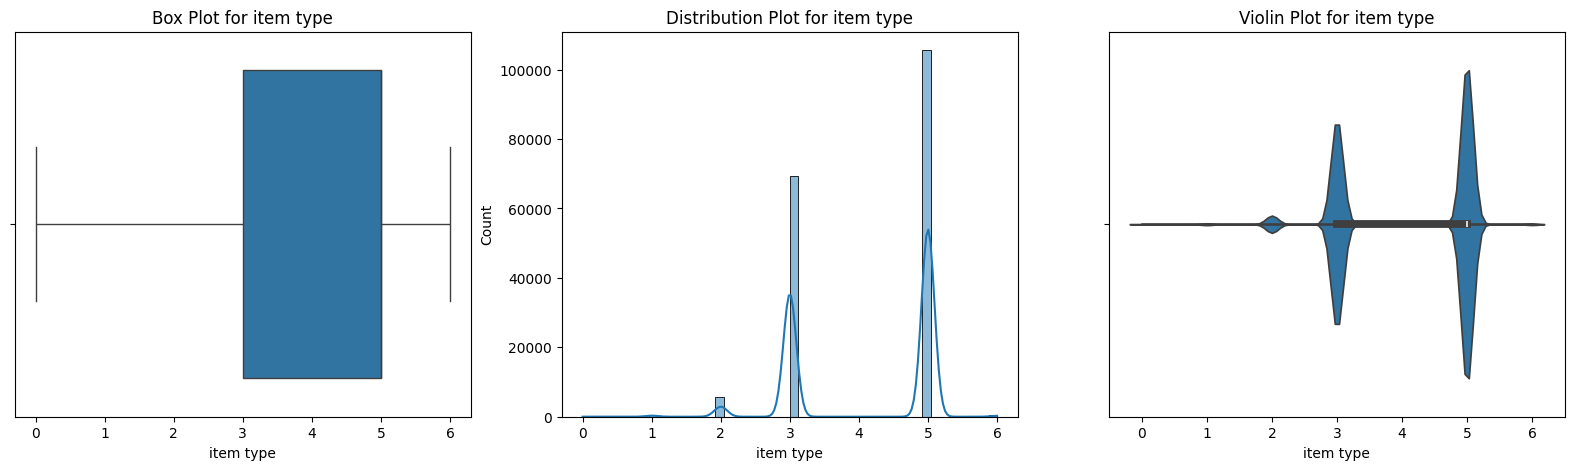

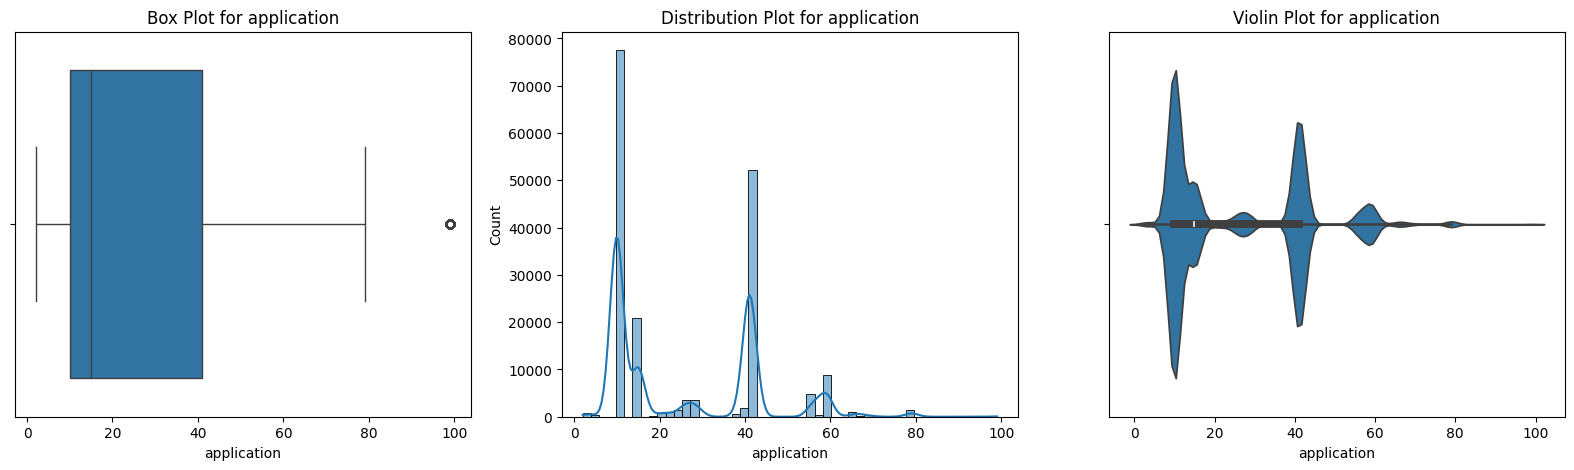

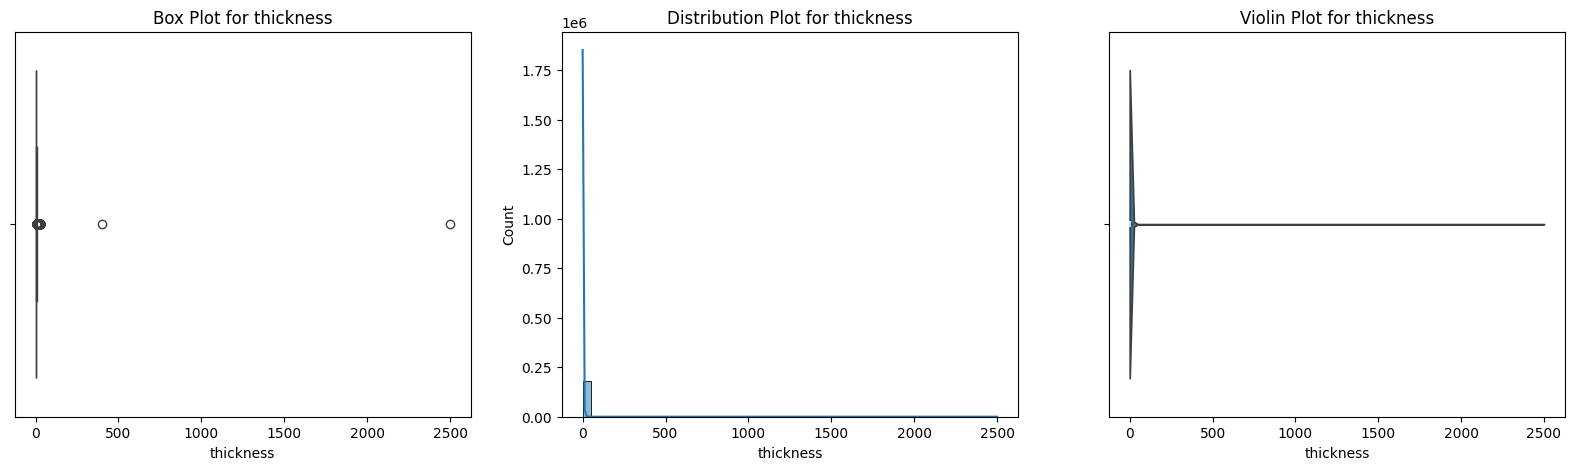

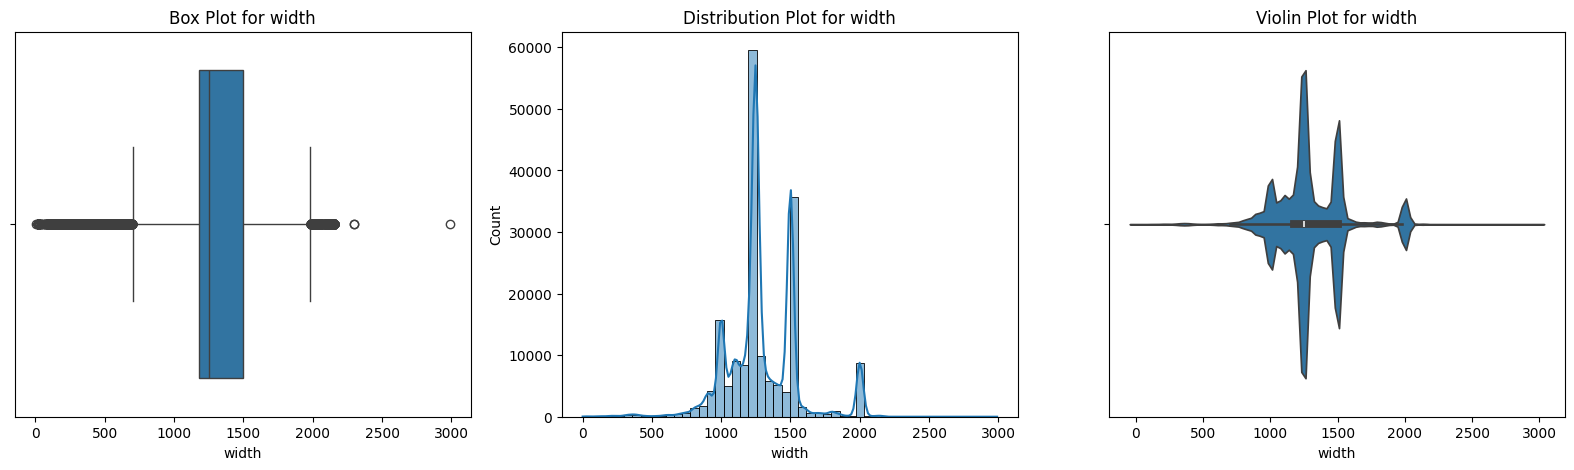

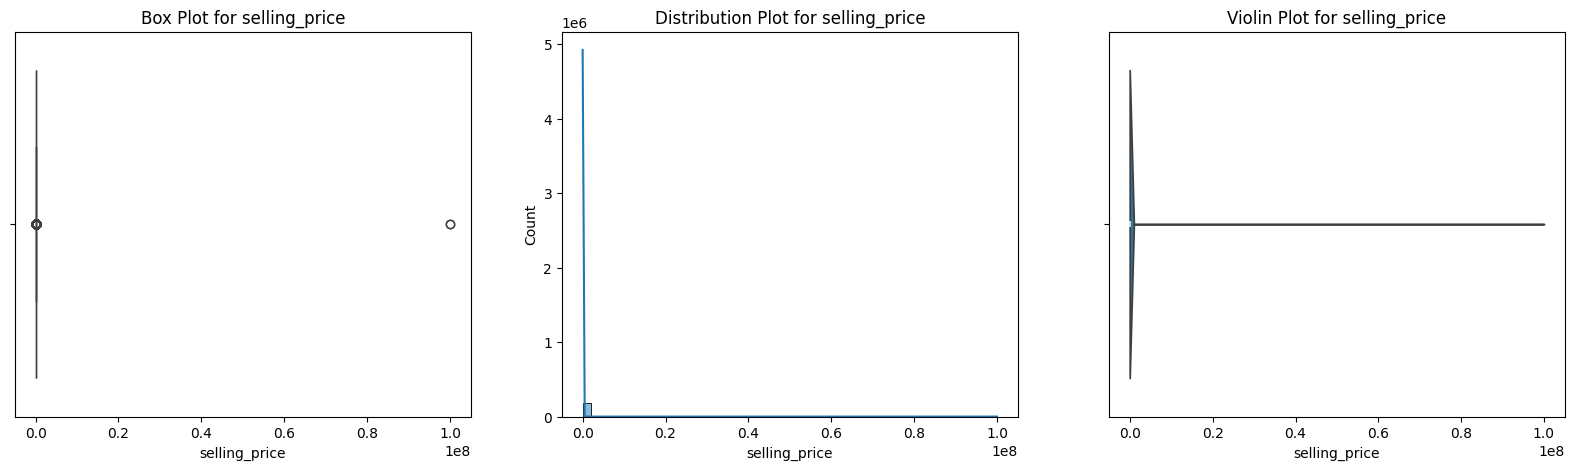

In [25]:
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(data, i)

In [26]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

import numpy as np


data1 = data.copy()
data1['quantity tons_log'] = np.log(data1['quantity tons'])
data1['thickness_log'] = np.log(data1['thickness'])
data1['selling_price_log'] = np.log(data1['selling_price'])
data1.head(5)

item_date  quantity tons    customer  country  status  item type  \
0  20210401.0      54.151139  30156308.0     28.0       1        5.0   
1  20210401.0     768.024839  30202938.0     25.0       1        5.0   
2  20210401.0     386.127949  30153963.0     30.0       1        6.0   
3  20210401.0     202.411065  30349574.0     32.0       1        3.0   
4  20210401.0     785.526262  30211560.0     28.0       1        5.0   

   application  thickness   width  product_ref  delivery date  selling_price  \
0         10.0       2.00  1500.0   1670798778     20210701.0         854.00   
1         41.0       0.80  1210.0   1668701718     20210401.0        1047.00   
2         28.0       0.38   952.0       628377     20210101.0         644.33   
3         59.0       2.30  1317.0   1668701718     20210101.0         768.00   
4         10.0       4.00  2000.0       640665     20210301.0         577.00   

  item_date_1 delivery date_1  quantity tons_log  thickness_log  \
0  2021-04-01      2021-07-01           3.991779       0.693147   
1  2021-04-01      2021-04-01           6.643822      -0.223144   
2  2021-04-01      2021-01-01           5.956169      -0.967584   
3  2021-04-01      2021-01-01           5.310301       0.832909   
4  2021-04-01      2021-03-01           6.666354       1.386294   

   selling_price_log  
0           6.749931  
1           6.953684  
2           6.468211  
3           6.643790  
4           6.357842

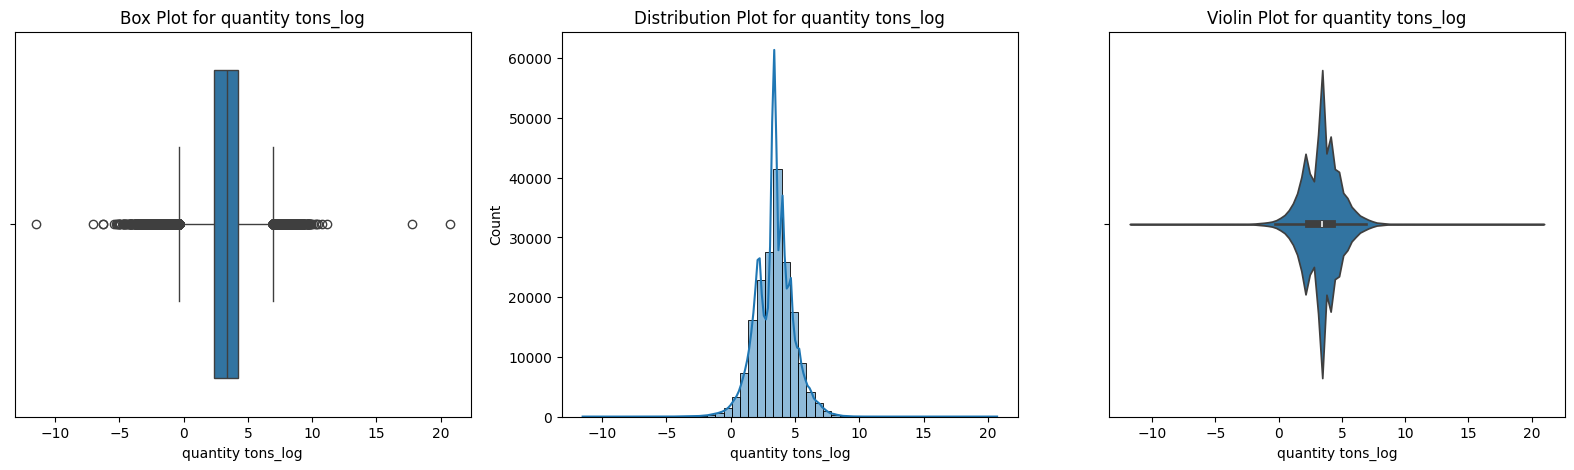

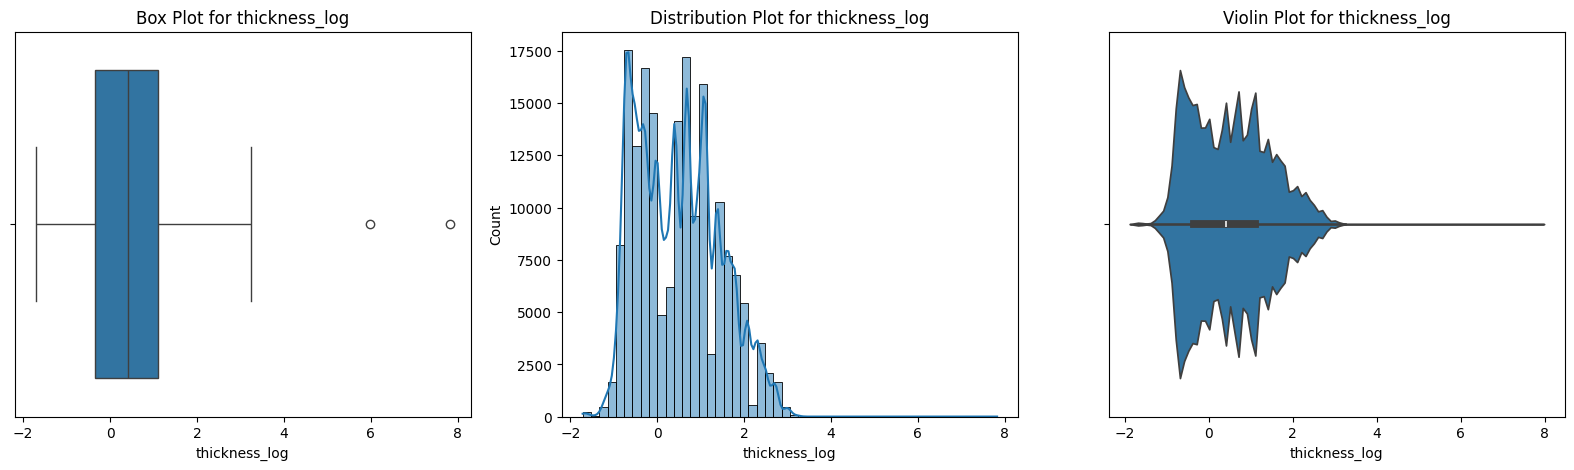

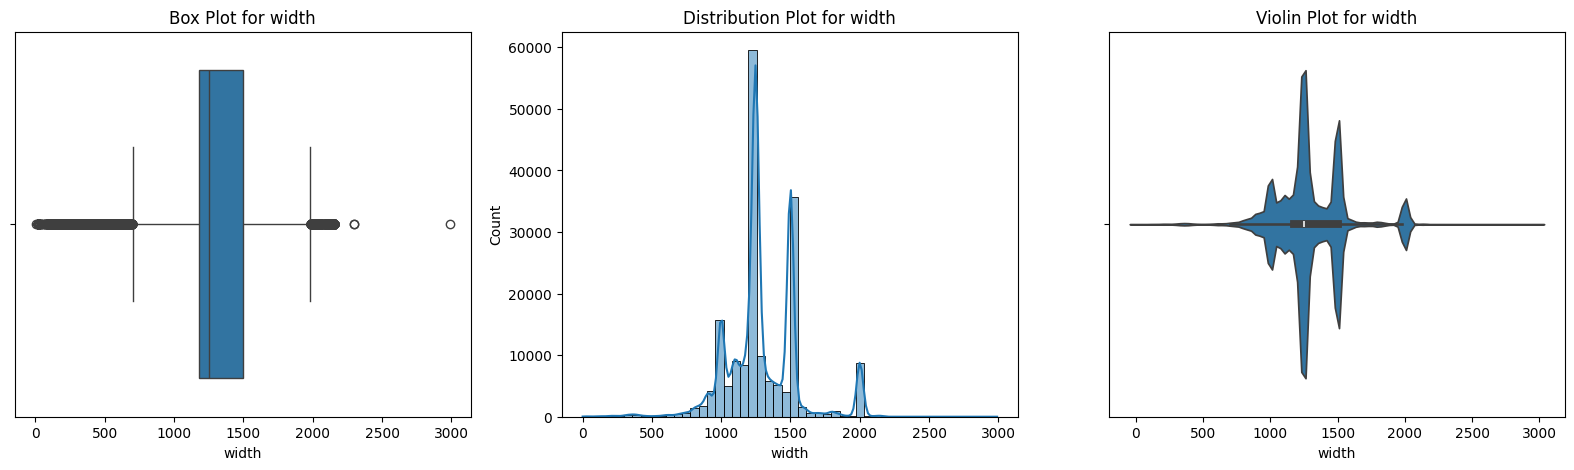

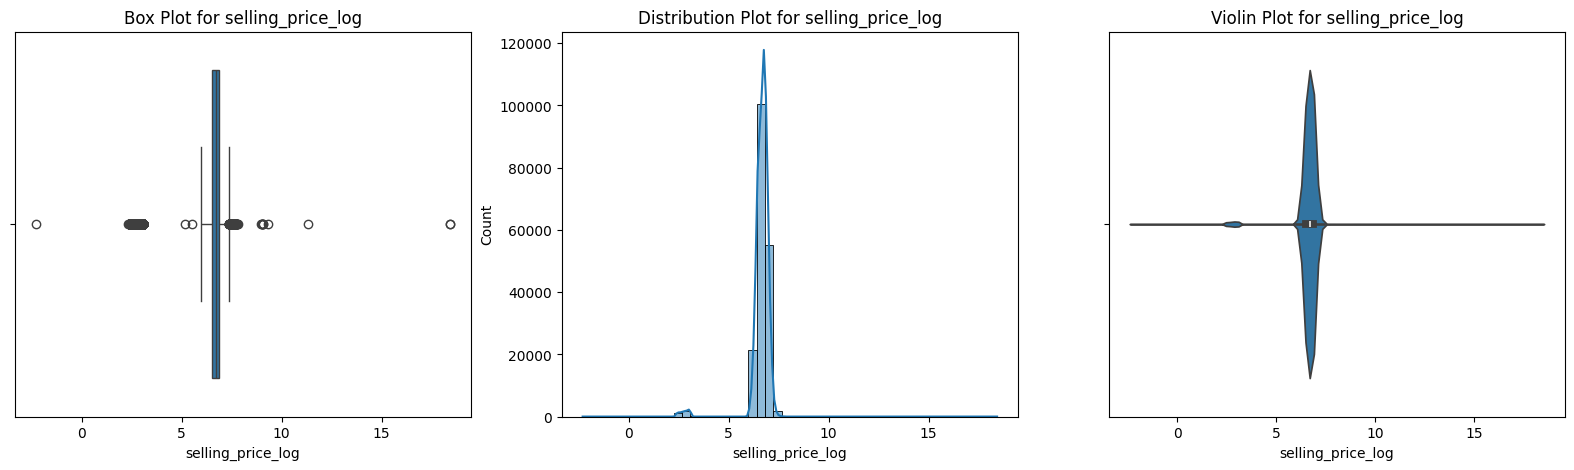

In [27]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(data1, i)

In [28]:
# Outliers Handling - Interquartile Range (IQR) method

In [29]:
data2 = data1.copy()

In [30]:
data2

item_date  quantity tons    customer  country  status  item type  \
0       20210401.0      54.151139  30156308.0     28.0       1        5.0   
1       20210401.0     768.024839  30202938.0     25.0       1        5.0   
2       20210401.0     386.127949  30153963.0     30.0       1        6.0   
3       20210401.0     202.411065  30349574.0     32.0       1        3.0   
4       20210401.0     785.526262  30211560.0     28.0       1        5.0   
...            ...            ...         ...      ...     ...        ...   
181668  20200702.0     102.482422  30200854.0     25.0       1        5.0   
181669  20200702.0     208.086469  30200854.0     25.0       1        5.0   
181670  20200702.0       4.235594  30200854.0     25.0       1        5.0   
181671  20200702.0      30.365013  30200854.0     25.0       1        5.0   
181672  20200702.0     406.686538  30200854.0     25.0       1        5.0   

        application  thickness   width  product_ref  delivery date  \
0              10.0       2.00  1500.0   1670798778     20210701.0   
1              41.0       0.80  1210.0   1668701718     20210401.0   
2              28.0       0.38   952.0       628377     20210101.0   
3              59.0       2.30  1317.0   1668701718     20210101.0   
4              10.0       4.00  2000.0       640665     20210301.0   
...             ...        ...     ...          ...            ...   
181668         41.0       0.96  1220.0    164141591     20200701.0   
181669         41.0       0.95  1500.0    164141591     20200701.0   
181670         41.0       0.71  1250.0    164141591     20200701.0   
181671         41.0       0.85  1250.0    164141591     20200701.0   
181672         41.0       0.71  1240.0    164141591     20200701.0   

        selling_price item_date_1 delivery date_1  quantity tons_log  \
0              854.00  2021-04-01      2021-07-01           3.991779   
1             1047.00  2021-04-01      2021-04-01           6.643822   
2              644.33  2021-04-01      2021-01-01           5.956169   
3              768.00  2021-04-01      2021-01-01           5.310301   
4              577.00  2021-04-01      2021-03-01           6.666354   
...               ...         ...             ...                ...   
181668         591.00  2020-07-02      2020-07-01           4.629691   
181669         589.00  2020-07-02      2020-07-01           5.337954   
181670         619.00  2020-07-02      2020-07-01           1.443523   
181671         601.00  2020-07-02      2020-07-01           3.413291   
181672         607.00  2020-07-02      2020-07-01           6.008043   

        thickness_log  selling_price_log  
0            0.693147           6.749931  
1           -0.223144           6.953684  
2           -0.967584           6.468211  
3            0.832909           6.643790  
4            1.386294           6.357842  
...               ...                ...  
181668      -0.040822           6.381816  
181669      -0.051293           6.378426  
181670      -0.342490           6.428105  
181671      -0.162519           6.398595  
181672      -0.342490           6.408529  

[181673 rows x 17 columns]

In [31]:

# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [32]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outlier(data2, 'quantity tons_log')
outlier(data2, 'thickness_log')
outlier(data2, 'selling_price_log')
outlier(data2, 'width')
data2.head()

item_date  quantity tons    customer  country  status  item type  \
0  20210401.0      54.151139  30156308.0     28.0       1        5.0   
1  20210401.0     768.024839  30202938.0     25.0       1        5.0   
2  20210401.0     386.127949  30153963.0     30.0       1        6.0   
3  20210401.0     202.411065  30349574.0     32.0       1        3.0   
4  20210401.0     785.526262  30211560.0     28.0       1        5.0   

   application  thickness   width  product_ref  delivery date  selling_price  \
0         10.0       2.00  1500.0   1670798778     20210701.0         854.00   
1         41.0       0.80  1210.0   1668701718     20210401.0        1047.00   
2         28.0       0.38   952.0       628377     20210101.0         644.33   
3         59.0       2.30  1317.0   1668701718     20210101.0         768.00   
4         10.0       4.00  1980.0       640665     20210301.0         577.00   

  item_date_1 delivery date_1  quantity tons_log  thickness_log  \
0  2021-04-01      2021-07-01           3.991779       0.693147   
1  2021-04-01      2021-04-01           6.643822      -0.223144   
2  2021-04-01      2021-01-01           5.956169      -0.967584   
3  2021-04-01      2021-01-01           5.310301       0.832909   
4  2021-04-01      2021-03-01           6.666354       1.386294   

   selling_price_log  
0           6.749931  
1           6.953684  
2           6.468211  
3           6.643790  
4           6.357842

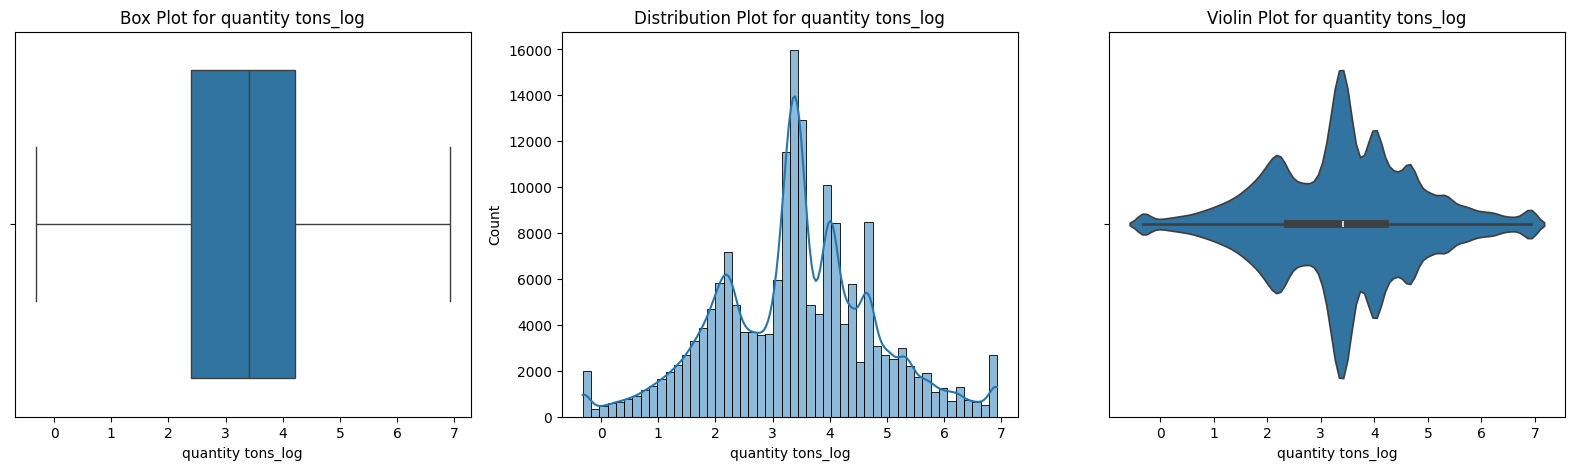

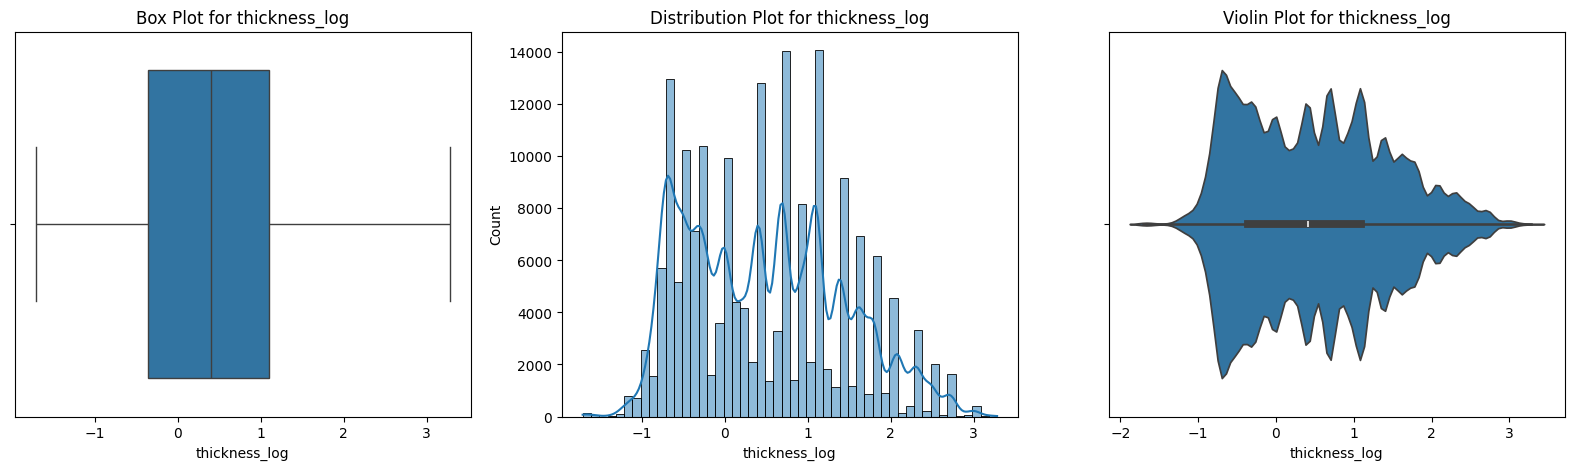

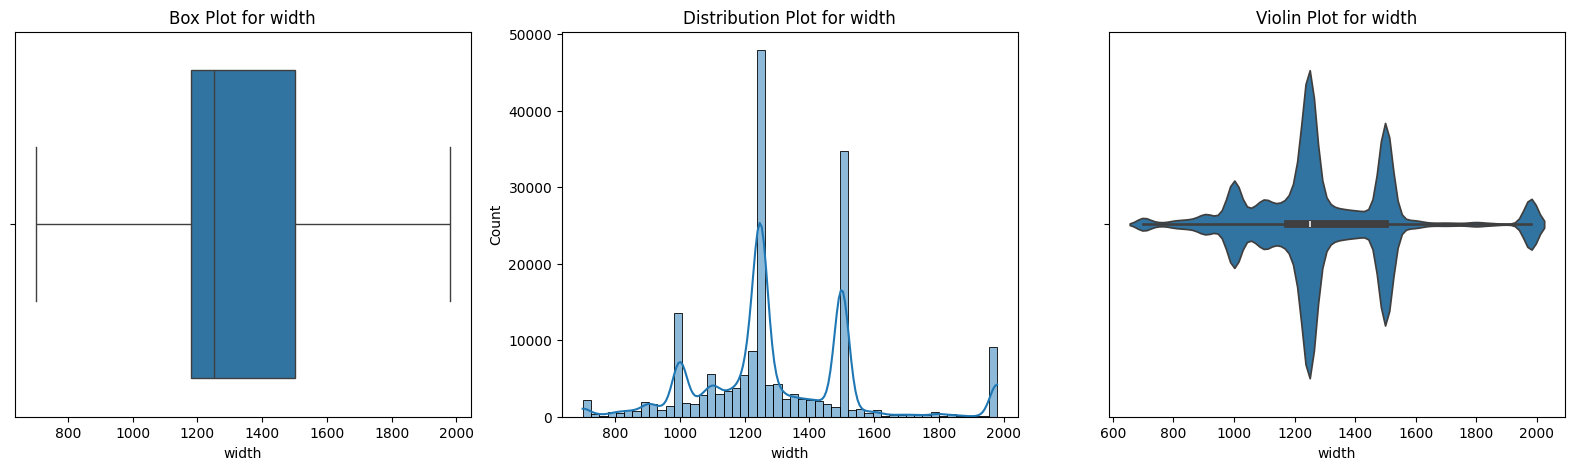

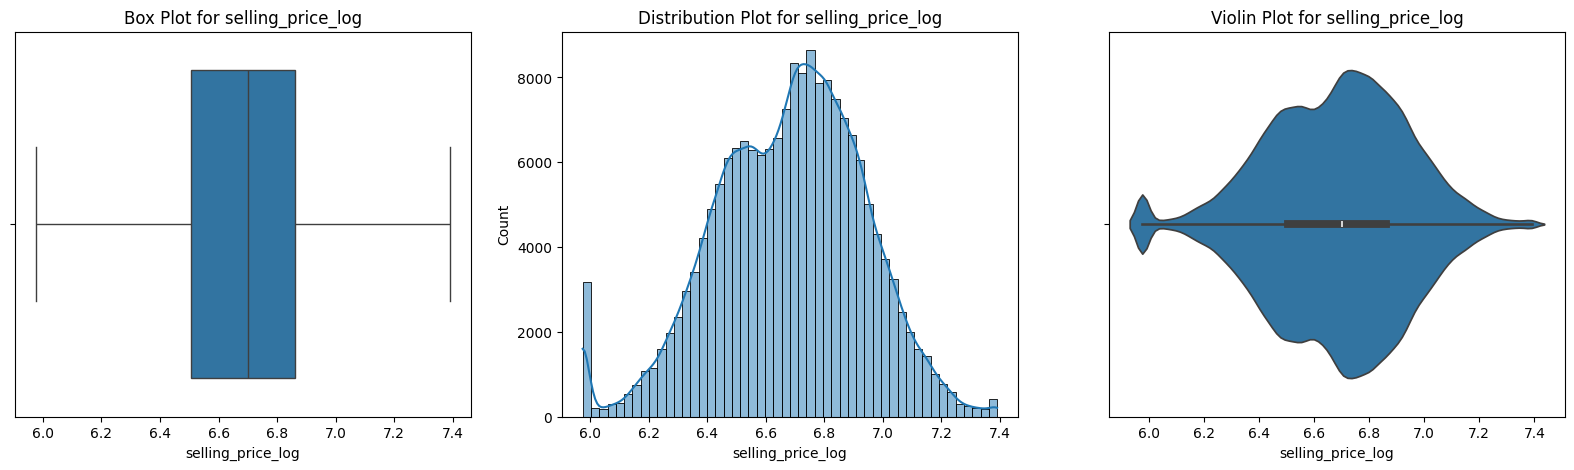

In [33]:
# transform the outliers to within range using IQR and clip() methods - box plot

for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(data2, i)

In [34]:
data2.describe().T

count          mean           std           min  \
item_date          181673.0  2.020459e+07  4.551114e+03  1.995000e+07   
quantity tons      181673.0  5.874905e+03  2.349075e+06  1.000000e-05   
customer           181673.0  3.051221e+07  2.433375e+07  1.245800e+04   
country            181673.0  4.489073e+01  2.440303e+01  2.500000e+01   
status             181673.0  1.316684e+00  1.330310e+00  0.000000e+00   
item type          181673.0  4.133036e+00  1.055230e+00  0.000000e+00   
application        181673.0  2.561441e+01  1.775342e+01  2.000000e+00   
thickness          181673.0  2.564822e+00  6.572303e+00  1.800000e-01   
width              181673.0  1.297046e+03  2.489619e+02  7.000000e+02   
product_ref        181673.0  4.739679e+08  7.175101e+08  6.117280e+05   
delivery date      181673.0  2.020738e+07  2.411052e+04  2.019040e+07   
selling_price      181673.0  1.918076e+03  3.317947e+05  1.000000e-01   
quantity tons_log  181673.0  3.392950e+00  1.394622e+00 -3.223344e-01   
thickness_log      181673.0  4.803321e-01  9.335680e-01 -1.714798e+00   
selling_price_log  181673.0  6.680786e+00  2.553793e-01  5.975038e+00   

                            25%           50%           75%           max  
item_date          2.020093e+07  2.020113e+07  2.021020e+07  2.021040e+07  
quantity tons      1.097167e+01  3.036501e+01  6.716038e+01  1.000000e+09  
customer           3.019688e+07  3.020524e+07  3.028042e+07  2.147484e+09  
country            2.600000e+01  3.000000e+01  7.800000e+01  1.130000e+02  
status             1.000000e+00  1.000000e+00  1.000000e+00  8.000000e+00  
item type          3.000000e+00  5.000000e+00  5.000000e+00  6.000000e+00  
application        1.000000e+01  1.500000e+01  4.100000e+01  9.900000e+01  
thickness          7.000000e-01  1.500000e+00  3.000000e+00  2.500000e+03  
width              1.180000e+03  1.250000e+03  1.500000e+03  1.980000e+03  
product_ref        6.119930e+05  6.406650e+05  1.332077e+09  1.722208e+09  
delivery date      2.020110e+07  2.021010e+07  2.021040e+07  3.031010e+07  
selling_price      6.690000e+02  8.120000e+02  9.530000e+02  1.000010e+08  
quantity tons_log  2.395316e+00  3.413291e+00  4.207084e+00  6.924734e+00  
thickness_log     -3.566749e-01  4.054651e-01  1.098612e+00  3.281543e+00  
selling_price_log  6.505784e+00  6.699500e+00  6.859615e+00  7.390361e+00

In [35]:
# after add the new column of 'quantity tons_log', 'thickness_log', 'selling_price_log', drop the existing columns
data3 = data2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
data3.head(5)

item_date    customer  country  status  item type  application   width  \
0  20210401.0  30156308.0     28.0       1        5.0         10.0  1500.0   
1  20210401.0  30202938.0     25.0       1        5.0         41.0  1210.0   
2  20210401.0  30153963.0     30.0       1        6.0         28.0   952.0   
3  20210401.0  30349574.0     32.0       1        3.0         59.0  1317.0   
4  20210401.0  30211560.0     28.0       1        5.0         10.0  1980.0   

   product_ref  delivery date item_date_1 delivery date_1  quantity tons_log  \
0   1670798778     20210701.0  2021-04-01      2021-07-01           3.991779   
1   1668701718     20210401.0  2021-04-01      2021-04-01           6.643822   
2       628377     20210101.0  2021-04-01      2021-01-01           5.956169   
3   1668701718     20210101.0  2021-04-01      2021-01-01           5.310301   
4       640665     20210301.0  2021-04-01      2021-03-01           6.666354   

   thickness_log  selling_price_log  
0       0.693147           6.749931  
1      -0.223144           6.953684  
2      -0.967584           6.468211  
3       0.832909           6.643790  
4       1.386294           6.357842

In [36]:
data3.dtypes

item_date            float64
customer             float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery date_1       object
quantity tons_log    float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [37]:
# Select only numeric columns for correlation
numeric_data = data3.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

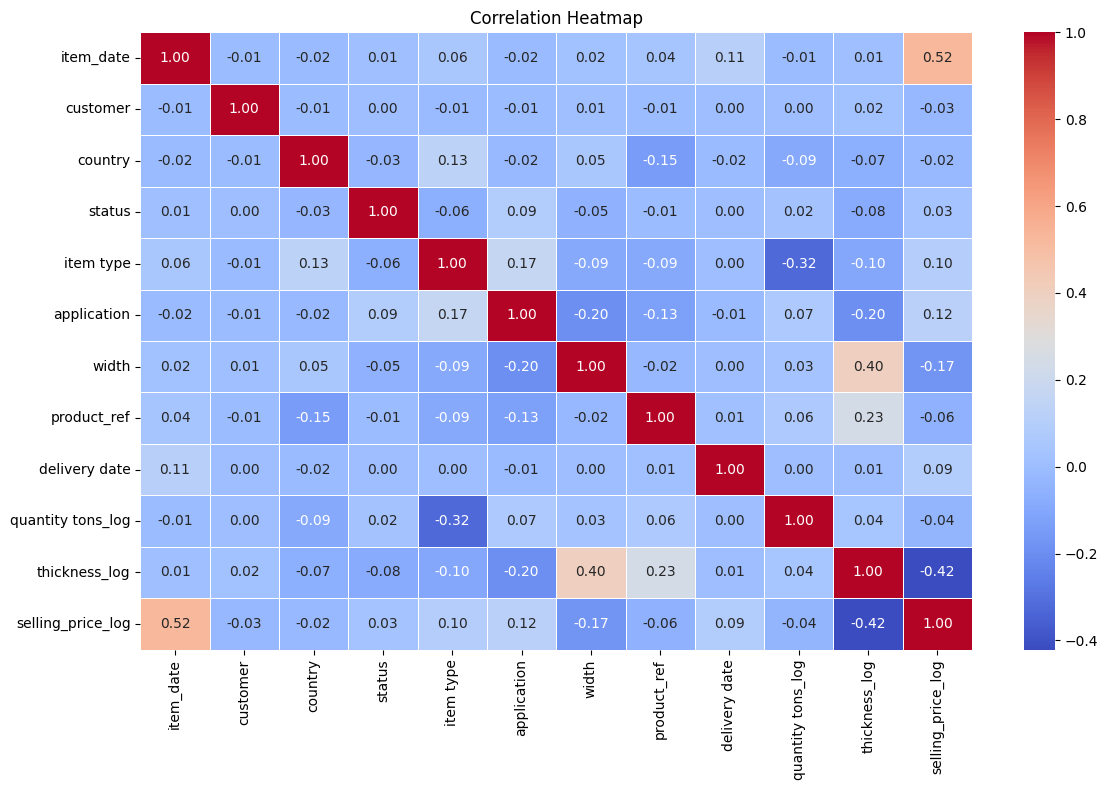

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()

Wrong Delivery Date handling

In [39]:
data4 = data3.copy()
data4.head()

item_date    customer  country  status  item type  application   width  \
0  20210401.0  30156308.0     28.0       1        5.0         10.0  1500.0   
1  20210401.0  30202938.0     25.0       1        5.0         41.0  1210.0   
2  20210401.0  30153963.0     30.0       1        6.0         28.0   952.0   
3  20210401.0  30349574.0     32.0       1        3.0         59.0  1317.0   
4  20210401.0  30211560.0     28.0       1        5.0         10.0  1980.0   

   product_ref  delivery date item_date_1 delivery date_1  quantity tons_log  \
0   1670798778     20210701.0  2021-04-01      2021-07-01           3.991779   
1   1668701718     20210401.0  2021-04-01      2021-04-01           6.643822   
2       628377     20210101.0  2021-04-01      2021-01-01           5.956169   
3   1668701718     20210101.0  2021-04-01      2021-01-01           5.310301   
4       640665     20210301.0  2021-04-01      2021-03-01           6.666354   

   thickness_log  selling_price_log  
0       0.693147           6.749931  
1      -0.223144           6.953684  
2      -0.967584           6.468211  
3       0.832909           6.643790  
4       1.386294           6.357842

In [40]:
data4.dtypes

item_date            float64
customer             float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery date_1       object
quantity tons_log    float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [41]:
# The 'delivery date' is previous date of 'item date'. so this is impossible. delivery date is always greater.

# find the difference between item and delivery date and add the new column of dataframe

# Convert the columns to datetime format
data4['item_date_1'] = pd.to_datetime(data4['item_date_1'])
data4['delivery date_1'] = pd.to_datetime(data4['delivery date_1'])

data4['Date_difference'] = (data4['delivery date_1'] - data4['item_date_1']).dt.days
data4.head()
     

item_date    customer  country  status  item type  application   width  \
0  20210401.0  30156308.0     28.0       1        5.0         10.0  1500.0   
1  20210401.0  30202938.0     25.0       1        5.0         41.0  1210.0   
2  20210401.0  30153963.0     30.0       1        6.0         28.0   952.0   
3  20210401.0  30349574.0     32.0       1        3.0         59.0  1317.0   
4  20210401.0  30211560.0     28.0       1        5.0         10.0  1980.0   

   product_ref  delivery date item_date_1 delivery date_1  quantity tons_log  \
0   1670798778     20210701.0  2021-04-01      2021-07-01           3.991779   
1   1668701718     20210401.0  2021-04-01      2021-04-01           6.643822   
2       628377     20210101.0  2021-04-01      2021-01-01           5.956169   
3   1668701718     20210101.0  2021-04-01      2021-01-01           5.310301   
4       640665     20210301.0  2021-04-01      2021-03-01           6.666354   

   thickness_log  selling_price_log  Date_difference  
0       0.693147           6.749931               91  
1      -0.223144           6.953684                0  
2      -0.967584           6.468211              -90  
3       0.832909           6.643790              -90  
4       1.386294           6.357842              -31

In [42]:

# split the day, month, and year from 'item_date_1' column and add dataframe (This data also help us to prediction)
data4['item_date_day'] = data4['item_date_1'].dt.day
data4['item_date_month'] = data4['item_date_1'].dt.month
data4['item_date_year'] = data4['item_date_1'].dt.year
data4.head()

item_date    customer  country  status  item type  application   width  \
0  20210401.0  30156308.0     28.0       1        5.0         10.0  1500.0   
1  20210401.0  30202938.0     25.0       1        5.0         41.0  1210.0   
2  20210401.0  30153963.0     30.0       1        6.0         28.0   952.0   
3  20210401.0  30349574.0     32.0       1        3.0         59.0  1317.0   
4  20210401.0  30211560.0     28.0       1        5.0         10.0  1980.0   

   product_ref  delivery date item_date_1 delivery date_1  quantity tons_log  \
0   1670798778     20210701.0  2021-04-01      2021-07-01           3.991779   
1   1668701718     20210401.0  2021-04-01      2021-04-01           6.643822   
2       628377     20210101.0  2021-04-01      2021-01-01           5.956169   
3   1668701718     20210101.0  2021-04-01      2021-01-01           5.310301   
4       640665     20210301.0  2021-04-01      2021-03-01           6.666354   

   thickness_log  selling_price_log  Date_difference  item_date_day  \
0       0.693147           6.749931               91              1   
1      -0.223144           6.953684                0              1   
2      -0.967584           6.468211              -90              1   
3       0.832909           6.643790              -90              1   
4       1.386294           6.357842              -31              1   

   item_date_month  item_date_year  
0                4            2021  
1                4            2021  
2                4            2021  
3                4            2021  
4                4            2021

In [43]:
# split the non-negative value of 'Date_difference' column in separate dataframe
df_f1 = data4[data4['Date_difference']>=0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_f1 = df_f1.reset_index(drop=True)
df_f1

item_date    customer  country  status  item type  application  \
0       20210401.0  30156308.0     28.0       1        5.0         10.0   
1       20210401.0  30202938.0     25.0       1        5.0         41.0   
2       20210401.0  30202938.0     25.0       1        5.0         41.0   
3       20210401.0  30209509.0     30.0       2        5.0         41.0   
4       20210401.0  30341428.0     38.0       1        3.0         10.0   
...            ...         ...      ...     ...        ...          ...   
165558  20200702.0  30227718.0     25.0       0        3.0         15.0   
165559  20200702.0  30161559.0     30.0       0        3.0         10.0   
165560  20200702.0  30161559.0     30.0       0        3.0         10.0   
165561  20200702.0  30161559.0     30.0       0        3.0         10.0   
165562  20200702.0  30161559.0     30.0       0        3.0         10.0   

         width  product_ref  delivery date item_date_1 delivery date_1  \
0       1500.0   1670798778     20210701.0  2021-04-01      2021-07-01   
1       1210.0   1668701718     20210401.0  2021-04-01      2021-04-01   
2       1265.0   1668701718     20210401.0  2021-04-01      2021-04-01   
3       1125.0       611993     20210701.0  2021-04-01      2021-07-01   
4       1275.0   1668701376     20210701.0  2021-04-01      2021-07-01   
...        ...          ...            ...         ...             ...   
165558  1980.0       640665     20200801.0  2020-07-02      2020-08-01   
165559  1525.0       640665     20200801.0  2020-07-02      2020-08-01   
165560  1525.0       640665     20200801.0  2020-07-02      2020-08-01   
165561  1500.0       640665     20200801.0  2020-07-02      2020-08-01   
165562  1830.0       640665     20200801.0  2020-07-02      2020-08-01   

        quantity tons_log  thickness_log  selling_price_log  Date_difference  \
0                3.991779       0.693147           6.749931               91   
1                6.643822      -0.223144           6.953684                0   
2                5.419608       0.405465           6.890609                0   
3                1.259203      -0.967584           5.975038               91   
4                4.235147      -0.510826           7.217443               91   
...                   ...            ...                ...              ...   
165558           3.472467       1.791759           6.313548               30   
165559           4.196171       1.348073           6.126869               30   
165560           4.156686       1.766442           6.124683               30   
165561           4.025862       2.060514           6.126869               30   
165562           5.328963       1.348073           6.131226               30   

        item_date_day  item_date_month  item_date_year  
0                   1                4            2021  
1                   1                4            2021  
2                   1                4            2021  
3                   1                4            2021  
4                   1                4            2021  
...               ...              ...             ...  
165558              2                7            2020  
165559              2                7            2020  
165560              2                7            2020  
165561              2                7            2020  
165562              2                7            2020  

[165563 rows x 18 columns]

In [44]:
# split the negative value of 'Date_difference' column in another dataframe
df_f2 = data4[data4['Date_difference']<0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_f2 = df_f2.reset_index(drop=True)
df_f2

item_date    customer  country  status  item type  application  \
0      20210401.0  30153963.0     30.0       1        6.0         28.0   
1      20210401.0  30349574.0     32.0       1        3.0         59.0   
2      20210401.0  30211560.0     28.0       1        5.0         10.0   
3      20210401.0  30342192.0     32.0       1        5.0         41.0   
4      20210401.0  30342192.0     32.0       1        5.0         41.0   
...           ...         ...      ...     ...        ...          ...   
16105  20200702.0  30200854.0     25.0       1        5.0         41.0   
16106  20200702.0  30200854.0     25.0       1        5.0         41.0   
16107  20200702.0  30200854.0     25.0       1        5.0         41.0   
16108  20200702.0  30200854.0     25.0       1        5.0         41.0   
16109  20200702.0  30200854.0     25.0       1        5.0         41.0   

        width  product_ref  delivery date item_date_1 delivery date_1  \
0       952.0       628377     20210101.0  2021-04-01      2021-01-01   
1      1317.0   1668701718     20210101.0  2021-04-01      2021-01-01   
2      1980.0       640665     20210301.0  2021-04-01      2021-03-01   
3      1220.0       611993     20210101.0  2021-04-01      2021-01-01   
4      1220.0       611993     20210101.0  2021-04-01      2021-01-01   
...       ...          ...            ...         ...             ...   
16105  1220.0    164141591     20200701.0  2020-07-02      2020-07-01   
16106  1500.0    164141591     20200701.0  2020-07-02      2020-07-01   
16107  1250.0    164141591     20200701.0  2020-07-02      2020-07-01   
16108  1250.0    164141591     20200701.0  2020-07-02      2020-07-01   
16109  1240.0    164141591     20200701.0  2020-07-02      2020-07-01   

       quantity tons_log  thickness_log  selling_price_log  Date_difference  \
0               5.956169      -0.967584           6.468211              -90   
1               5.310301       0.832909           6.643790              -90   
2               6.666354       1.386294           6.357842              -31   
3               4.730808      -0.385662           6.836259              -90   
4               4.736160      -0.597837           6.860664              -90   
...                  ...            ...                ...              ...   
16105           4.629691      -0.040822           6.381816               -1   
16106           5.337954      -0.051293           6.378426               -1   
16107           1.443523      -0.342490           6.428105               -1   
16108           3.413291      -0.162519           6.398595               -1   
16109           6.008043      -0.342490           6.408529               -1   

       item_date_day  item_date_month  item_date_year  
0                  1                4            2021  
1                  1                4            2021  
2                  1                4            2021  
3                  1                4            2021  
4                  1                4            2021  
...              ...              ...             ...  
16105              2                7            2020  
16106              2                7            2020  
16107              2                7            2020  
16108              2                7            2020  
16109              2                7            2020  

[16110 rows x 18 columns]

In [45]:
# These 16110 values 'delivery date' are lesser than 'item date'.
# First we need to train the ML model using correct 'delivery date' data (df_f1) and predict the 'Date_difference'(df_f2) using ML model.

In [46]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [47]:
# correct delivery date
df_f1.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'Date_difference', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [48]:
# find best algorithm for prediction based on R2, mean absolute error, mean squared error and root mean squared error values

def machine_learning_delivery_date(df, algorithm):

    x = df.drop(columns=['item_date_1','delivery date_1','Date_difference'], axis=1)
    y = df['Date_difference']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'Algorithm': str(algorithm).split("'")[1].split(".")[-1],
               'R2': r2,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

    return metrics

In [49]:

print(machine_learning_delivery_date(df_f1, DecisionTreeRegressor))
print(machine_learning_delivery_date(df_f1, ExtraTreesRegressor))
print(machine_learning_delivery_date(df_f1, RandomForestRegressor))
print(machine_learning_delivery_date(df_f1, AdaBoostRegressor))
print(machine_learning_delivery_date(df_f1, GradientBoostingRegressor))
print(machine_learning_delivery_date(df_f1, XGBRegressor))
     

{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9999624046468146, 'Mean Absolute Error': np.float64(0.006764714764593966), 'Mean Squared Error': np.float64(0.4557122580255489), 'Root Mean Squared Error': np.float64(0.6750646324801418)}
{'Algorithm': 'ExtraTreesRegressor', 'R2': 0.9999959079969993, 'Mean Absolute Error': np.float64(0.0115972578745508), 'Mean Squared Error': np.float64(0.048959520430042286), 'Root Mean Squared Error': np.float64(0.2212679832918497)}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9999854703494558, 'Mean Absolute Error': np.float64(0.005145713164014134), 'Mean Squared Error': np.float64(0.022672524386192733), 'Root Mean Squared Error': np.float64(0.15057398309865067)}
{'Algorithm': 'AdaBoostRegressor', 'R2': 0.0715026917492233, 'Mean Absolute Error': np.float64(21.472936773074018), 'Mean Squared Error': np.float64(11083.152412136267), 'Root Mean Squared Error': np.float64(105.2765520528492)}
{'Algorithm': 'GradientBoostingRegressor', 'R2': 0.977806308710257

In [50]:
# R²: ExtraTreesRegressor has the highest R² value (0.9897), indicating it explains most of the variance in the data.
# MAE: ExtraTreesRegressor has the lowest MAE (0.196), indicating it has the smallest average error.
# MSE: ExtraTreesRegressor has a significantly lower MSE (124.973) compared to the others, except for the GradientBoostingRegressor which also performs well.
# RMSE: ExtraTreesRegressor also has a significantly lower RMSE (11.179).

In [51]:
# train the model by using ExtraTreesRegressor algorithm to predict 'Date difference'
# 'item_date_1','delivery date_1' - this columns are non-numerical and cannot passed, so skip the columns in model training and prediction.

def ml_date_difference():

    # train the model by using correct delivery date (df_f1) dataframe
    x = df_f1.drop(columns=['item_date_1','delivery date_1','Date_difference'], axis=1)
    y = df_f1['Date_difference']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    model = ExtraTreesRegressor().fit(x_train, y_train)

    # predict the 'Date_difference' of df_f2 columns using model
    y_pred_list = []

    for index, row in df_f2.iterrows():
        input_data = row.drop(['item_date_1','delivery date_1','Date_difference'])
        y_pred = model.predict([input_data])
        y_pred_list.append(y_pred[0])

    return y_pred_list

In [52]:
# Machine learning model predict the date difference of (df_f2) datafame
date_difference = ml_date_difference()

d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ex

In [53]:
print(date_difference)

[np.float64(13.69), np.float64(13.2), np.float64(3.74), np.float64(13.52), np.float64(13.52), np.float64(15.29), np.float64(15.2), np.float64(15.24), np.float64(197.81), np.float64(1.07), np.float64(2.42), np.float64(2.42), np.float64(12.81), np.float64(12.81), np.float64(12.81), np.float64(12.81), np.float64(12.81), np.float64(12.81), np.float64(12.81), np.float64(12.81), np.float64(12.81), np.float64(12.81), np.float64(12.8), np.float64(12.81), np.float64(12.81), np.float64(12.81), np.float64(12.81), np.float64(12.8), np.float64(12.77), np.float64(12.81), np.float64(12.76), np.float64(11.57), np.float64(11.57), np.float64(11.57), np.float64(13.73), np.float64(13.73), np.float64(2.39), np.float64(2.59), np.float64(2.67), np.float64(2.8), np.float64(2.78), np.float64(2.71), np.float64(13.84), np.float64(13.84), np.float64(14.08), np.float64(14.08), np.float64(14.08), np.float64(13.11), np.float64(13.85), np.float64(13.85), np.float64(14.08), np.float64(14.08), np.float64(3.53), np.floa

In [54]:

# convert float values into integer using list comprehension method
date_difference1 = [int(round(i,0)) for i in date_difference]
print(date_difference1)

[14, 13, 4, 14, 14, 15, 15, 15, 198, 1, 2, 2, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 14, 14, 2, 3, 3, 3, 3, 3, 14, 14, 14, 14, 14, 13, 14, 14, 14, 14, 4, 13, 11, 11, 12, 17, 17, 17, 5, 5, 6, 20, 13, 15, 15, 15, 22, 22, 20, 14, 14, 14, 7, 7, 7, 15, 15, 8, 7, 7, 7, 9, 9, 9, 9, 9, 7, 7, 16, 17, 18, 16, 16, 18, 16, 16, 16, 16, 17, 17, 17, 15, 15, 15, 8, 8, 8, 8, 8, 15, 8, 7, 7, 19, 19, 16, 16, 16, 18, 8, 8, 9, 19, 12, 19, 19, 18, 11, 11, 11, 11, 11, 19, 19, 21, 21, 14, 21, 23, 21, 23, 21, 25, 21, 12, 21, 21, 12, 19, 20, 20, 20, 21, 25, 25, 11, 21, 26, 20, 26, 20, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 10, 13, 19, 19, 19, 12, 12, 19, 20, 19, 20, 12, 28, 28, 28, 28, 28, 28, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 13, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2

In [55]:
# add 'Date_difference' column in the dataframe
df_f2['Date_difference'] = pd.DataFrame(date_difference1)
df_f2

item_date    customer  country  status  item type  application  \
0      20210401.0  30153963.0     30.0       1        6.0         28.0   
1      20210401.0  30349574.0     32.0       1        3.0         59.0   
2      20210401.0  30211560.0     28.0       1        5.0         10.0   
3      20210401.0  30342192.0     32.0       1        5.0         41.0   
4      20210401.0  30342192.0     32.0       1        5.0         41.0   
...           ...         ...      ...     ...        ...          ...   
16105  20200702.0  30200854.0     25.0       1        5.0         41.0   
16106  20200702.0  30200854.0     25.0       1        5.0         41.0   
16107  20200702.0  30200854.0     25.0       1        5.0         41.0   
16108  20200702.0  30200854.0     25.0       1        5.0         41.0   
16109  20200702.0  30200854.0     25.0       1        5.0         41.0   

        width  product_ref  delivery date item_date_1 delivery date_1  \
0       952.0       628377     20210101.0  2021-04-01      2021-01-01   
1      1317.0   1668701718     20210101.0  2021-04-01      2021-01-01   
2      1980.0       640665     20210301.0  2021-04-01      2021-03-01   
3      1220.0       611993     20210101.0  2021-04-01      2021-01-01   
4      1220.0       611993     20210101.0  2021-04-01      2021-01-01   
...       ...          ...            ...         ...             ...   
16105  1220.0    164141591     20200701.0  2020-07-02      2020-07-01   
16106  1500.0    164141591     20200701.0  2020-07-02      2020-07-01   
16107  1250.0    164141591     20200701.0  2020-07-02      2020-07-01   
16108  1250.0    164141591     20200701.0  2020-07-02      2020-07-01   
16109  1240.0    164141591     20200701.0  2020-07-02      2020-07-01   

       quantity tons_log  thickness_log  selling_price_log  Date_difference  \
0               5.956169      -0.967584           6.468211               14   
1               5.310301       0.832909           6.643790               13   
2               6.666354       1.386294           6.357842                4   
3               4.730808      -0.385662           6.836259               14   
4               4.736160      -0.597837           6.860664               14   
...                  ...            ...                ...              ...   
16105           4.629691      -0.040822           6.381816               30   
16106           5.337954      -0.051293           6.378426               30   
16107           1.443523      -0.342490           6.428105               30   
16108           3.413291      -0.162519           6.398595               30   
16109           6.008043      -0.342490           6.408529               30   

       item_date_day  item_date_month  item_date_year  
0                  1                4            2021  
1                  1                4            2021  
2                  1                4            2021  
3                  1                4            2021  
4                  1                4            2021  
...              ...              ...             ...  
16105              2                7            2020  
16106              2                7            2020  
16107              2                7            2020  
16108              2                7            2020  
16109              2                7            2020  

[16110 rows x 18 columns]

In [56]:
# calculate delivery date (item_date + Date_difference = delivery_date)

from datetime import timedelta


def find_delivery_date(item_date, date_difference):

    result_date = item_date + timedelta(days=date_difference)

    delivery_date = result_date.strftime("%Y-%m-%d")

    return delivery_date

In [57]:

# find out the delivery date and add to dataframe

df_f2['item_date_1'] = pd.to_datetime(df_f2['item_date_1'])
df_f2['delivery date_1'] = df_f2.apply(lambda x: find_delivery_date(x['item_date_1'], x['Date_difference']), axis=1)
df_f2

item_date    customer  country  status  item type  application  \
0      20210401.0  30153963.0     30.0       1        6.0         28.0   
1      20210401.0  30349574.0     32.0       1        3.0         59.0   
2      20210401.0  30211560.0     28.0       1        5.0         10.0   
3      20210401.0  30342192.0     32.0       1        5.0         41.0   
4      20210401.0  30342192.0     32.0       1        5.0         41.0   
...           ...         ...      ...     ...        ...          ...   
16105  20200702.0  30200854.0     25.0       1        5.0         41.0   
16106  20200702.0  30200854.0     25.0       1        5.0         41.0   
16107  20200702.0  30200854.0     25.0       1        5.0         41.0   
16108  20200702.0  30200854.0     25.0       1        5.0         41.0   
16109  20200702.0  30200854.0     25.0       1        5.0         41.0   

        width  product_ref  delivery date item_date_1 delivery date_1  \
0       952.0       628377     20210101.0  2021-04-01      2021-04-15   
1      1317.0   1668701718     20210101.0  2021-04-01      2021-04-14   
2      1980.0       640665     20210301.0  2021-04-01      2021-04-05   
3      1220.0       611993     20210101.0  2021-04-01      2021-04-15   
4      1220.0       611993     20210101.0  2021-04-01      2021-04-15   
...       ...          ...            ...         ...             ...   
16105  1220.0    164141591     20200701.0  2020-07-02      2020-08-01   
16106  1500.0    164141591     20200701.0  2020-07-02      2020-08-01   
16107  1250.0    164141591     20200701.0  2020-07-02      2020-08-01   
16108  1250.0    164141591     20200701.0  2020-07-02      2020-08-01   
16109  1240.0    164141591     20200701.0  2020-07-02      2020-08-01   

       quantity tons_log  thickness_log  selling_price_log  Date_difference  \
0               5.956169      -0.967584           6.468211               14   
1               5.310301       0.832909           6.643790               13   
2               6.666354       1.386294           6.357842                4   
3               4.730808      -0.385662           6.836259               14   
4               4.736160      -0.597837           6.860664               14   
...                  ...            ...                ...              ...   
16105           4.629691      -0.040822           6.381816               30   
16106           5.337954      -0.051293           6.378426               30   
16107           1.443523      -0.342490           6.428105               30   
16108           3.413291      -0.162519           6.398595               30   
16109           6.008043      -0.342490           6.408529               30   

       item_date_day  item_date_month  item_date_year  
0                  1                4            2021  
1                  1                4            2021  
2                  1                4            2021  
3                  1                4            2021  
4                  1                4            2021  
...              ...              ...             ...  
16105              2                7            2020  
16106              2                7            2020  
16107              2                7            2020  
16108              2                7            2020  
16109              2                7            2020  

[16110 rows x 18 columns]

In [59]:

# Finally concatinate the both dataframe into single dataframe
df_final = pd.concat([df_f1,df_f2], axis=0, ignore_index=True)
df_final

item_date    customer  country  status  item type  application  \
0       20210401.0  30156308.0     28.0       1        5.0         10.0   
1       20210401.0  30202938.0     25.0       1        5.0         41.0   
2       20210401.0  30202938.0     25.0       1        5.0         41.0   
3       20210401.0  30209509.0     30.0       2        5.0         41.0   
4       20210401.0  30341428.0     38.0       1        3.0         10.0   
...            ...         ...      ...     ...        ...          ...   
181668  20200702.0  30200854.0     25.0       1        5.0         41.0   
181669  20200702.0  30200854.0     25.0       1        5.0         41.0   
181670  20200702.0  30200854.0     25.0       1        5.0         41.0   
181671  20200702.0  30200854.0     25.0       1        5.0         41.0   
181672  20200702.0  30200854.0     25.0       1        5.0         41.0   

         width  product_ref  delivery date item_date_1      delivery date_1  \
0       1500.0   1670798778     20210701.0  2021-04-01  2021-07-01 00:00:00   
1       1210.0   1668701718     20210401.0  2021-04-01  2021-04-01 00:00:00   
2       1265.0   1668701718     20210401.0  2021-04-01  2021-04-01 00:00:00   
3       1125.0       611993     20210701.0  2021-04-01  2021-07-01 00:00:00   
4       1275.0   1668701376     20210701.0  2021-04-01  2021-07-01 00:00:00   
...        ...          ...            ...         ...                  ...   
181668  1220.0    164141591     20200701.0  2020-07-02           2020-08-01   
181669  1500.0    164141591     20200701.0  2020-07-02           2020-08-01   
181670  1250.0    164141591     20200701.0  2020-07-02           2020-08-01   
181671  1250.0    164141591     20200701.0  2020-07-02           2020-08-01   
181672  1240.0    164141591     20200701.0  2020-07-02           2020-08-01   

        quantity tons_log  thickness_log  selling_price_log  Date_difference  \
0                3.991779       0.693147           6.749931               91   
1                6.643822      -0.223144           6.953684                0   
2                5.419608       0.405465           6.890609                0   
3                1.259203      -0.967584           5.975038               91   
4                4.235147      -0.510826           7.217443               91   
...                   ...            ...                ...              ...   
181668           4.629691      -0.040822           6.381816               30   
181669           5.337954      -0.051293           6.378426               30   
181670           1.443523      -0.342490           6.428105               30   
181671           3.413291      -0.162519           6.398595               30   
181672           6.008043      -0.342490           6.408529               30   

        item_date_day  item_date_month  item_date_year  
0                   1                4            2021  
1                   1                4            2021  
2                   1                4            2021  
3                   1                4            2021  
4                   1                4            2021  
...               ...              ...             ...  
181668              2                7            2020  
181669              2                7            2020  
181670              2                7            2020  
181671              2                7            2020  
181672              2                7            2020  

[181673 rows x 18 columns]

In [60]:
# split the day, month, and year from 'delivery_date_1' column and add dataframe (This data also help us to prediction)

df_final['delivery date_1'] = pd.to_datetime(df_final['delivery date_1'])

df_final['delivery_date_day'] = df_final['delivery date_1'].dt.day
df_final['delivery_date_month'] = df_final['delivery date_1'].dt.month
df_final['delivery_date_year'] = df_final['delivery date_1'].dt.year

# finally drop the item_date, delivery_date and date_difference columns
df_final.drop(columns=['item_date','delivery date','item_date_1','delivery date_1','Date_difference'], inplace=True)
df_final

customer  country  status  item type  application   width  \
0       30156308.0     28.0       1        5.0         10.0  1500.0   
1       30202938.0     25.0       1        5.0         41.0  1210.0   
2       30202938.0     25.0       1        5.0         41.0  1265.0   
3       30209509.0     30.0       2        5.0         41.0  1125.0   
4       30341428.0     38.0       1        3.0         10.0  1275.0   
...            ...      ...     ...        ...          ...     ...   
181668  30200854.0     25.0       1        5.0         41.0  1220.0   
181669  30200854.0     25.0       1        5.0         41.0  1500.0   
181670  30200854.0     25.0       1        5.0         41.0  1250.0   
181671  30200854.0     25.0       1        5.0         41.0  1250.0   
181672  30200854.0     25.0       1        5.0         41.0  1240.0   

        product_ref  quantity tons_log  thickness_log  selling_price_log  \
0        1670798778           3.991779       0.693147           6.749931   
1        1668701718           6.643822      -0.223144           6.953684   
2        1668701718           5.419608       0.405465           6.890609   
3            611993           1.259203      -0.967584           5.975038   
4        1668701376           4.235147      -0.510826           7.217443   
...             ...                ...            ...                ...   
181668    164141591           4.629691      -0.040822           6.381816   
181669    164141591           5.337954      -0.051293           6.378426   
181670    164141591           1.443523      -0.342490           6.428105   
181671    164141591           3.413291      -0.162519           6.398595   
181672    164141591           6.008043      -0.342490           6.408529   

        item_date_day  item_date_month  item_date_year  delivery_date_day  \
0                   1                4            2021                  1   
1                   1                4            2021                  1   
2                   1                4            2021                  1   
3                   1                4            2021                  1   
4                   1                4            2021                  1   
...               ...              ...             ...                ...   
181668              2                7            2020                  1   
181669              2                7            2020                  1   
181670              2                7            2020                  1   
181671              2                7            2020                  1   
181672              2                7            2020                  1   

        delivery_date_month  delivery_date_year  
0                         7                2021  
1                         4                2021  
2                         4                2021  
3                         7                2021  
4                         7                2021  
...                     ...                 ...  
181668                    8                2020  
181669                    8                2020  
181670                    8                2020  
181671                    8                2020  
181672                    8                2020  

[181673 rows x 16 columns]

Classification Method - Predict Status

In [61]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

In [62]:
df_final.head()

customer  country  status  item type  application   width  product_ref  \
0  30156308.0     28.0       1        5.0         10.0  1500.0   1670798778   
1  30202938.0     25.0       1        5.0         41.0  1210.0   1668701718   
2  30202938.0     25.0       1        5.0         41.0  1265.0   1668701718   
3  30209509.0     30.0       2        5.0         41.0  1125.0       611993   
4  30341428.0     38.0       1        3.0         10.0  1275.0   1668701376   

   quantity tons_log  thickness_log  selling_price_log  item_date_day  \
0           3.991779       0.693147           6.749931              1   
1           6.643822      -0.223144           6.953684              1   
2           5.419608       0.405465           6.890609              1   
3           1.259203      -0.967584           5.975038              1   
4           4.235147      -0.510826           7.217443              1   

   item_date_month  item_date_year  delivery_date_day  delivery_date_month  \
0                4            2021                  1                    7   
1                4            2021                  1                    4   
2                4            2021                  1                    4   
3                4            2021                  1                    7   
4                4            2021                  1                    7   

   delivery_date_year  
0                2021  
1                2021  
2                2021  
3                2021  
4                2021

In [63]:
df_final.dtypes

customer               float64
country                float64
status                   int64
item type              float64
application            float64
width                  float64
product_ref              int64
quantity tons_log      float64
thickness_log          float64
selling_price_log      float64
item_date_day            int32
item_date_month          int32
item_date_year           int32
delivery_date_day        int32
delivery_date_month      int32
delivery_date_year       int32
dtype: object

In [64]:

df_classifier = df_final.copy()

# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df_classifier = df_classifier[(df_classifier.status == 1) | (df_classifier.status == 0)]
df_classifier

customer  country  status  item type  application   width  \
0       30156308.0     28.0       1        5.0         10.0  1500.0   
1       30202938.0     25.0       1        5.0         41.0  1210.0   
2       30202938.0     25.0       1        5.0         41.0  1265.0   
4       30341428.0     38.0       1        3.0         10.0  1275.0   
5       30202938.0     25.0       1        5.0         41.0  1165.0   
...            ...      ...     ...        ...          ...     ...   
181668  30200854.0     25.0       1        5.0         41.0  1220.0   
181669  30200854.0     25.0       1        5.0         41.0  1500.0   
181670  30200854.0     25.0       1        5.0         41.0  1250.0   
181671  30200854.0     25.0       1        5.0         41.0  1250.0   
181672  30200854.0     25.0       1        5.0         41.0  1240.0   

        product_ref  quantity tons_log  thickness_log  selling_price_log  \
0        1670798778           3.991779       0.693147           6.749931   
1        1668701718           6.643822      -0.223144           6.953684   
2        1668701718           5.419608       0.405465           6.890609   
4        1668701376           4.235147      -0.510826           7.217443   
5        1668701718           6.446714       0.405465           6.890609   
...             ...                ...            ...                ...   
181668    164141591           4.629691      -0.040822           6.381816   
181669    164141591           5.337954      -0.051293           6.378426   
181670    164141591           1.443523      -0.342490           6.428105   
181671    164141591           3.413291      -0.162519           6.398595   
181672    164141591           6.008043      -0.342490           6.408529   

        item_date_day  item_date_month  item_date_year  delivery_date_day  \
0                   1                4            2021                  1   
1                   1                4            2021                  1   
2                   1                4            2021                  1   
4                   1                4            2021                  1   
5                   1                4            2021                  1   
...               ...              ...             ...                ...   
181668              2                7            2020                  1   
181669              2                7            2020                  1   
181670              2                7            2020                  1   
181671              2                7            2020                  1   
181672              2                7            2020                  1   

        delivery_date_month  delivery_date_year  
0                         7                2021  
1                         4                2021  
2                         4                2021  
4                         7                2021  
5                         4                2021  
...                     ...                 ...  
181668                    8                2020  
181669                    8                2020  
181670                    8                2020  
181671                    8                2020  
181672                    8                2020  

[150450 rows x 16 columns]

In [65]:
df_classifier['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [66]:

# in status feature, the 'Won' and 'Lost' value difference is very high. So we need to oversampling to reduce the difference

x = df_classifier.drop('status', axis=1)
y = df_classifier['status']

x_new, y_new = SMOTETomek().fit_resample(x,y)

In [67]:
x.shape, y.shape, x_new.shape, y_new.shape

((150450, 15), (150450,), (229580, 15), (229580,))

In [68]:
# check the accuracy of training and testing using metrics
# algorithm.__name__  - it return the algorithm name

def machine_learning_classification(x_new,y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}

    return accuracy_metrics

In [69]:

print(machine_learning_classification(x_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(x_new, y_new, ExtraTreesClassifier))
print(machine_learning_classification(x_new, y_new, RandomForestClassifier))
print(machine_learning_classification(x_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(x_new, y_new, GradientBoostingClassifier))
print(machine_learning_classification(x_new, y_new, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9658724627580799}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9862139559195052}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9837529401515811}


d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.7682616081540203, 'accuracy_test': 0.7677280250892935}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8170790138513808, 'accuracy_test': 0.8167305514417632}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.954128190608938, 'accuracy_test': 0.9479919853645788}


In [70]:
print(machine_learning_classification(x, y, DecisionTreeClassifier))
print(machine_learning_classification(x, y, ExtraTreesClassifier))
print(machine_learning_classification(x, y, RandomForestClassifier))
print(machine_learning_classification(x, y, AdaBoostClassifier))
print(machine_learning_classification(x, y, GradientBoostingClassifier))
print(machine_learning_classification(x, y, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9519441674975074}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9730807577268196}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 0.9999916915918909, 'accuracy_test': 0.9699900299102692}


d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.8172150216018611, 'accuracy_test': 0.8169159189099369}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8351030242605517, 'accuracy_test': 0.8328015952143569}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9462695247590561, 'accuracy_test': 0.9322366234629444}


In [71]:

# we got good accuracy after oversampling
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [73]:

# evaluate all the parameter combinations and return the best parameters based on score
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [75]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9878473734645875, 0.9734079623660598)

In [76]:

# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

# predict the status and check the accuracy using metrics

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

[[22927   186]
 [ 1026 21777]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     23113
           1       0.99      0.96      0.97     22803

    accuracy                           0.97     45916
   macro avg       0.97      0.97      0.97     45916
weighted avg       0.97      0.97      0.97     45916



In [77]:

# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)
     

0.9734792505361665


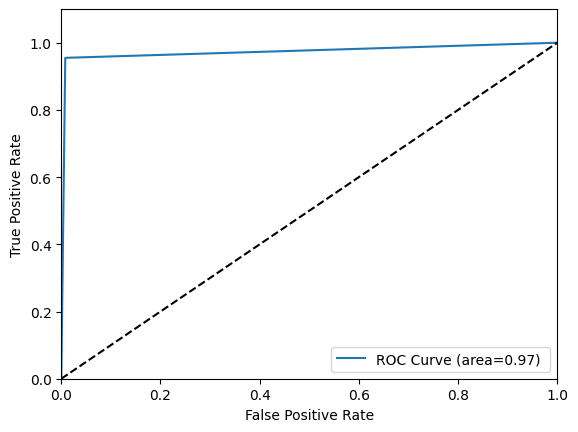

In [78]:

plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [79]:
# will pass the user data manually to check the prediction of status ar our model

user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [80]:
user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')
     

Lose


d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [81]:

import sklearn
print(sklearn.__version__)

1.5.0


In [82]:
# save the classification model by using pickle

import pickle

with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [83]:
# load pickle model to predict the status (like Trained brain).

with open('classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [74]:

grid_search.best_score_

np.float64(0.9716166437268179)

In [84]:
# Regression Method - Prdict Selling Price

In [85]:

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [86]:

df_final
     

customer  country  status  item type  application   width  \
0       30156308.0     28.0       1        5.0         10.0  1500.0   
1       30202938.0     25.0       1        5.0         41.0  1210.0   
2       30202938.0     25.0       1        5.0         41.0  1265.0   
3       30209509.0     30.0       2        5.0         41.0  1125.0   
4       30341428.0     38.0       1        3.0         10.0  1275.0   
...            ...      ...     ...        ...          ...     ...   
181668  30200854.0     25.0       1        5.0         41.0  1220.0   
181669  30200854.0     25.0       1        5.0         41.0  1500.0   
181670  30200854.0     25.0       1        5.0         41.0  1250.0   
181671  30200854.0     25.0       1        5.0         41.0  1250.0   
181672  30200854.0     25.0       1        5.0         41.0  1240.0   

        product_ref  quantity tons_log  thickness_log  selling_price_log  \
0        1670798778           3.991779       0.693147           6.749931   
1        1668701718           6.643822      -0.223144           6.953684   
2        1668701718           5.419608       0.405465           6.890609   
3            611993           1.259203      -0.967584           5.975038   
4        1668701376           4.235147      -0.510826           7.217443   
...             ...                ...            ...                ...   
181668    164141591           4.629691      -0.040822           6.381816   
181669    164141591           5.337954      -0.051293           6.378426   
181670    164141591           1.443523      -0.342490           6.428105   
181671    164141591           3.413291      -0.162519           6.398595   
181672    164141591           6.008043      -0.342490           6.408529   

        item_date_day  item_date_month  item_date_year  delivery_date_day  \
0                   1                4            2021                  1   
1                   1                4            2021                  1   
2                   1                4            2021                  1   
3                   1                4            2021                  1   
4                   1                4            2021                  1   
...               ...              ...             ...                ...   
181668              2                7            2020                  1   
181669              2                7            2020                  1   
181670              2                7            2020                  1   
181671              2                7            2020                  1   
181672              2                7            2020                  1   

        delivery_date_month  delivery_date_year  
0                         7                2021  
1                         4                2021  
2                         4                2021  
3                         7                2021  
4                         7                2021  
...                     ...                 ...  
181668                    8                2020  
181669                    8                2020  
181670                    8                2020  
181671                    8                2020  
181672                    8                2020  

[181673 rows x 16 columns]

In [87]:

df_final.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [88]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def machine_learning_regression(df, algorithm):

    x = df.drop(columns=['selling_price_log'], axis=1)
    y = df['selling_price_log']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [89]:

print(machine_learning_regression(df_final, DecisionTreeRegressor))
print(machine_learning_regression(df_final, ExtraTreesRegressor))
print(machine_learning_regression(df_final, RandomForestRegressor))
print(machine_learning_regression(df_final, AdaBoostRegressor))
print(machine_learning_regression(df_final, GradientBoostingRegressor))
print(machine_learning_regression(df_final, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999112581673122, 'R2_test': 0.928246790427762}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999112581673122, 'R2_test': 0.9557533636341448}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9939924090870599, 'R2_test': 0.9573537080429628}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.6533820210526013, 'R2_test': 0.6518866200092452}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8847908923389055, 'R2_test': 0.8858433009591837}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9508548359387518, 'R2_test': 0.9457922699068712}


In [91]:
#  ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.

In [90]:
x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)



In [92]:
param_grid_r = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [93]:
# best parameters for hypertuning the random forest algorithm for better accuracy in unseen data
grid_search_r.best_params_,grid_search_r.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 np.float64(0.9535446436338114))

In [94]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9863276543530191, 0.9562231804959361)

In [ ]:

# before hypertuning = 'algorithm': 'RandomForestRegressor', 'R2_train': 0.9940176821065443, 'R2_test': 0.9572742394942817

# compare before and after hypertuning, reduced the overfitting in training

In [95]:

# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9564325872086444,
 'Mean Absolute Error': np.float64(0.03242446508776295),
 'Mean Squared Error': np.float64(0.0028812639805856784),
 'Root Mean Squared Error': np.float64(0.05367740661195992)}

In [96]:

# manually passed the user input and predict the selling price

user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model.predict(user_data)
y_pred[0]

d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(6.942213144367458)

In [101]:
# using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])

np.float64(1035.0584156698042)

In [98]:
# save the regression model by using pickle

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [3]:
# load the pickle model to predict selling price
import pickle
import numpy as np
with open('regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]]))
np.exp(y_pred[0])
     

d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(1035.0584156698042)

In [20]:
import pickle

file_path = "myapp\\models\\regression_model.pkl"

try:
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    print(data)
except FileNotFoundError:
    print(f"File not found: {file_path}")
except pickle.UnpicklingError:
    print("Error: The file content is not a valid pickle format.")
except EOFError:
    print("Error: The file is incomplete or corrupted.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


RandomForestRegressor(max_depth=20, max_features=None)


In [97]:

# using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])
     

np.float64(1035.0584156698042)

In [ ]:

data['item type'].unique()

In [ ]:
from sklearn.impute import SimpleImputer
# Impute missing values in numerical columns with mean
imputer = SimpleImputer(strategy='mean')
data['quantity tons'] = imputer.fit_transform(data[['quantity tons']])

In [ ]:
# Drop rows with any remaining missing values
data_cleaned = data.dropna()

In [ ]:
# Display cleaned data
print(data_cleaned.info())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Descriptive Statistics
numerical_summary = data_cleaned.describe()

In [ ]:
numerical_summary

In [ ]:

# Categorical Analysis
categorical_summary = data_cleaned.select_dtypes(include=['object']).describe()

In [ ]:
categorical_summary

In [ ]:
# Visualizations

# Histograms for numerical columns
data_cleaned.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_cleaned.select_dtypes(include=['float64', 'int64']).melt(), x="variable", y="value")
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
data_cleaned.head()

In [ ]:
# Select only numeric columns for correlation
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()

In [ ]:
# Bar Plots for Categorical Columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns



In [ ]:
categorical_columns

In [ ]:
# for col in categorical_columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(data=data_cleaned, y=col, order=data_cleaned[col].value_counts().index)
#     plt.title(f'Distribution of {col}')
#     plt.tight_layout()
#     plt.show()


In [ ]:
print('hi')

In [ ]:
# Time Series Analysis (if applicable)
if 'item_date' in data_cleaned.columns:
    plt.figure(figsize=(12, 6))
    data_cleaned.set_index('item_date').resample('M').size().plot()
    plt.title('Monthly Count of Items')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
